## Setting things up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task1

1. Loading the data.
2. Displaying the first 10 rows.

In [2]:
sales_data = pd.read_csv('retail_sales.csv')

sales_data.head(10)

,TransactionID,Date,StoreID,ProductID,Quantity,UnitPrice,CustomerID,PaymentMethod,ProductCategory
0,T0001,2023-07-11,S003,P001,4,1496,C271,Cash,Printer
1,T0002,2023-10-04,S004,P002,2,1069,C305,Card,Headphones
2,T0003,2023-06-10,S005,P019,1,966,C391,Cash,Camera
3,T0004,2023-11-10,S002,P014,5,488,C211,Cash,Tablet
4,T0005,2023-01-22,S003,P020,3,1065,C168,Cash,Smartphone
5,T0006,2023-09-10,S004,P010,4,1130,C283,Card,Smartwatch
6,T0007,2023-08-24,S004,P009,2,547,C296,Online,Monitor
7,T0008,2023-12-11,S001,P010,1,218,C226,Card,Smartwatch
8,T0009,2023-02-18,S001,P006,1,1038,C275,Cash,Mouse
9,T0010,2023-02-28,S002,P017,5,610,C362,Online,Smartphone


3. Displaying columns.

In [3]:
sales_data.columns

Index(['TransactionID', 'Date', 'StoreID', 'ProductID', 'Quantity',
       'UnitPrice', 'CustomerID', 'PaymentMethod', 'ProductCategory'],
      dtype='object')

4. Displaying shape.

In [4]:
sales_data.shape

(5000, 9)

5. checking for null values.

In [5]:
#Checking for null values
sales_data.isnull().values.any()

np.False_

6. Checking for duplicates.

In [6]:
#checking to see if there is any duplicate
sales_data.duplicated().any()

np.False_

# Task 2

1. Since there are no null or duplicated values, no need to remove any row.
2. Converting **Date** to Datetime datatype.

In [7]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

3. Checking the datatypes of Quantity and UnitPrice, to check if they are integers or need conversion.

In [8]:
sales_data[['Quantity', 'UnitPrice']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Quantity   5000 non-null   int64
 1   UnitPrice  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.3 KB


4. Removing invalid prices or quantities.

In [9]:
invalid_indices = sales_data[(sales_data['UnitPrice'] < 0) | (sales_data['Quantity'] < 0)].index
sales_data.drop(index=invalid_indices, inplace=True)

# Task 3

1. Creating the TotalPrice column.

In [10]:
sales_data['TotalPrice'] = sales_data['Quantity'] * sales_data['UnitPrice']

2. Extracting year, month and DayOfWeek form the dataset.

In [11]:
year = sales_data['Date'].dt.year
month = sales_data['Date'].dt.month_name()
DayOfWeek = sales_data['Date'].dt.day_name()

3. Transaction period determination.

In [12]:
def select(row):
    if row.day_name() in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 'weekday'
    else:
        return 'weekend'
sales_data['Week'] = sales_data['Date'].apply(select)

# Task 4

1. Total sales for the year.

In [13]:
sales_data['TotalPrice'].sum()

np.int64(11706475)

2. Top 5 best-selling products.

In [14]:
#1. group the dataset by the products 
#2. calculate how much money was made by each product by summing the TotalPrice column
#3. Then sort the products in descending order of TotalPrice sum
top_selling = sales_data.groupby('ProductCategory').agg({'TotalPrice':'sum'}).sort_values(by='TotalPrice', ascending=False)

#4.Getting the top 5 products
top_selling.index[:5]

Index(['Monitor', 'Smartwatch', 'Printer', 'Camera', 'Smartphone'], dtype='object', name='ProductCategory')

3. Getting month with highest sales.

In [15]:
#1. Groupby month.
#2. Getting the number of sales, by counting the number of transaction in each month.
#3. Sorting the results by number of sales in decending order.
monthly_sales = sales_data.groupby(sales_data['Date'].dt.month_name()).agg(sales=('TransactionID', 'count')).sort_values(by='sales', ascending=False)

#getting the maximum number of sales
max_sales = monthly_sales['sales'].max()

#selecting the month with maximum sales
monthly_sales.index[monthly_sales['sales'] == max_sales]

Index(['August', 'May'], dtype='object', name='Date')

4. Most common payment method.

In [16]:
#select the paymentmethod column and count how many times each our.
#value_counts() method sorts the resulting series in descending order of count.
#Select the first index / value
sales_data['PaymentMethod'].value_counts().index[0]

'Online'

5. Average order value per store

In [17]:
# Groupby StoreID and then calculate the mean of the total price
sales_data.groupby('StoreID').agg({'TotalPrice': 'mean'})

,TotalPrice
StoreID,
S001,2350.111002
S002,2314.704225
S003,2347.863445
S004,2316.641684
S005,2378.735621


# Task 5

1. Line plot.

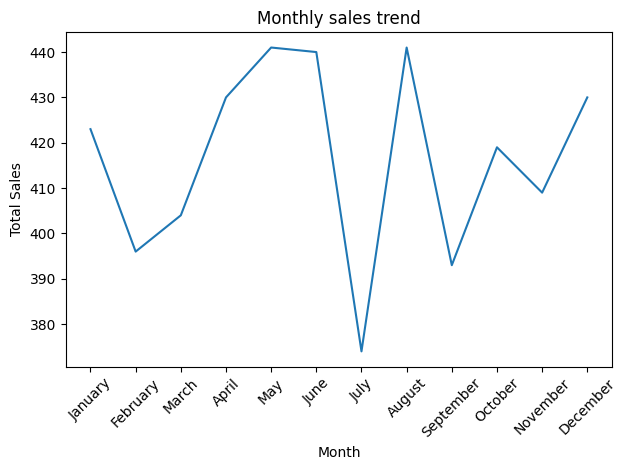

In [18]:
#Getting the axis and figure to plot on
fig, ax = plt.subplots()

#Getting months in order categorize the monthly_sales dataframe
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#resetting the index
monthly_sales = monthly_sales.reset_index()
#Categorizing the month so that the when sort it follow month order and not alphabetical order
monthly_sales['Date'] = pd.Categorical(monthly_sales['Date'], categories=month_order, ordered=True)
#Sorting month
monthly_sales.sort_values(by='Date', inplace=True)
#setting the x and y values
x_values = monthly_sales['Date']
y_values = monthly_sales['sales']

#plotting
ax.plot(x_values, y_values)

#Adding title, x and y labels
ax.set_title('Monthly sales trend')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.tick_params('x', rotation=45)

#adjust padding
plt.tight_layout()

2. Bar chart

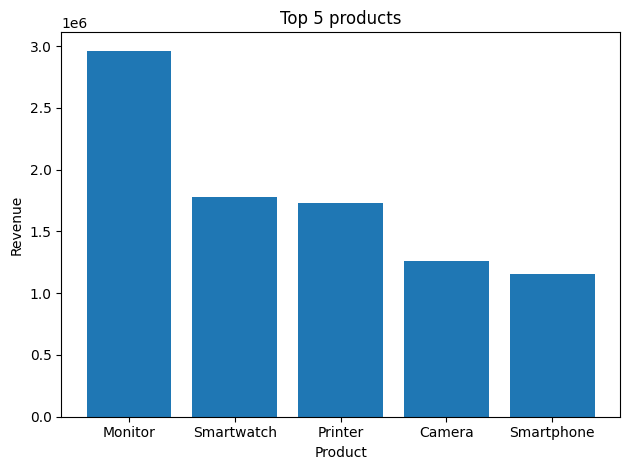

In [19]:
fig, ax = plt.subplots()

#getting the products
x_label = top_selling.index[:5]
#getting the prices of the top 5 products
y_label = top_selling.iloc[:5, 0]

#plotting bar chart
ax.bar(x_label, y_label)

ax.set_title('Top 5 products')
ax.set_xlabel('Product')
ax.set_ylabel('Revenue')

plt.tight_layout()

3. Pie chart

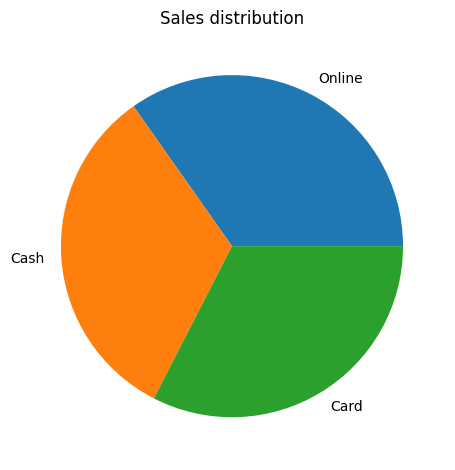

In [20]:
fig, ax = plt.subplots()

#getting the payment methods and their sales count
sales_distribution = sales_data['PaymentMethod'].value_counts()

label = sales_distribution.index
data = sales_distribution

ax.pie(data, labels=label)

ax.set_title('Sales distribution')

plt.tight_layout()

4. Histogram

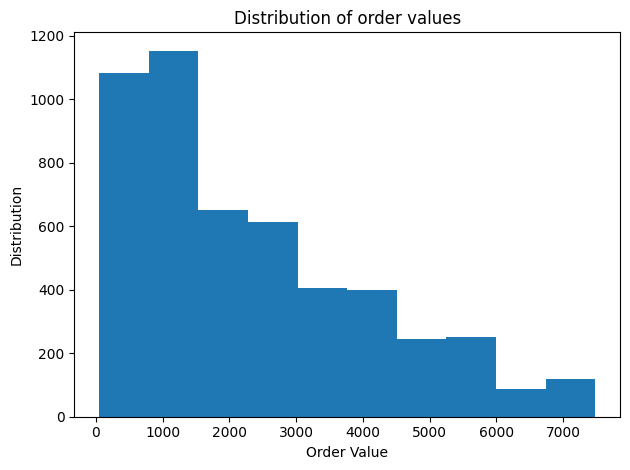

In [21]:
fig, ax = plt.subplots()

order_values = sales_data['TotalPrice']

ax.hist(order_values)

ax.set_title('Distribution of order values')
ax.set_xlabel('Order Value')
ax.set_ylabel('Distribution')

plt.tight_layout()

5. Grouped bar charts

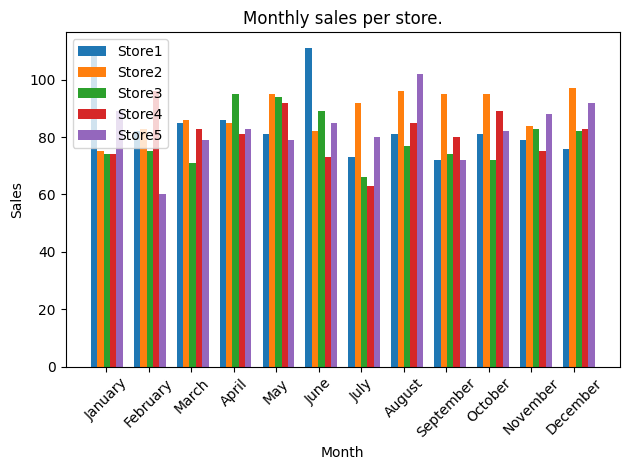

In [22]:
fig, ax = plt.subplots()

#getting the sales count for every store per month
store1 = sales_data[sales_data['StoreID'] == 'S001'].groupby(['StoreID', sales_data['Date'].dt.month]).agg(TransactionCount = ('TransactionID', 'count'))
store2 = sales_data[sales_data['StoreID'] == 'S002'].groupby(['StoreID', sales_data['Date'].dt.month]).agg(TransactionCount = ('TransactionID', 'count'))
store3 = sales_data[sales_data['StoreID'] == 'S003'].groupby(['StoreID', sales_data['Date'].dt.month]).agg(TransactionCount = ('TransactionID', 'count'))
store4 = sales_data[sales_data['StoreID'] == 'S004'].groupby(['StoreID', sales_data['Date'].dt.month]).agg(TransactionCount = ('TransactionID', 'count'))
store5 = sales_data[sales_data['StoreID'] == 'S005'].groupby(['StoreID', sales_data['Date'].dt.month]).agg(TransactionCount = ('TransactionID', 'count'))
#width of the bars
width = 0.15
#x values from 1 ... 12 with 1.01 to add space between groups
x = np.arange(1, 13) * 1.01

#plotting each bar chart
ax.bar(x - 2 * width, store1['TransactionCount'], width, label='Store1')
ax.bar(x - width, store2['TransactionCount'], width, label='Store2')
ax.bar(x, store3['TransactionCount'], width, label='Store3')
ax.bar(x + width, store4['TransactionCount'], width, label='Store4')
ax.bar(x + 2 * width, store5['TransactionCount'], width, label='Store5')

ax.set_title('Monthly sales per store.')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_xticks(ticks=np.arange(1, 13), labels=month_order)
ax.tick_params("x", rotation=45)

#adding the labels to the chart
plt.legend()
plt.tight_layout()

# Task 6

## Insights

1. Monitors are the most sold product in the year.
2. Most users pay for goods online.
3. August and May recorded the most sales out of the other months.

## Actions

1. Make online payment always available.
2. Increase monitors quantity in all stores.